# Correlation and feature importance

Ok, after looking at the general trends on the data, as well as lookin at proof that different subgroups have very different behaviors, it is time to figure out how variables correlate with each other, as well as finding which are the variables that better describe the variable we are interested in.

In this case, climbers will probably want to learn which variables correlate with their climbing performance, so we will use some analytic tools to find which variables are the best at predicting climbing performance. And being good at predicting something, usually means that modifying that would modify the variable of interest as you desire (become better climbers in this example).

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFECV

In [2]:
fullData = pd.read_csv("filteredData.csv").replace(np.nan,0)
fullData.describe()

,FEMALE,AGE,YRS_CLIMBING,START_AGE,PARENTS,HEIGHT,APEINDEX,WEIGHT,BMI,OCC_STUDY,...,B_INPOTENTIAL,B_OUTPOTENTIAL,S_FLASH,S_REDP,S_FLASHCONF,S_FINISHCONF,S_AVG,S_FPOTENTIAL,S_MPOTENTIAL,S_INCONSISTENCY
count,155.000000,155.00000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,...,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,0.400000,27.63871,5.356774,22.281935,0.083871,171.728258,0.696774,63.649677,21.493991,0.438710,...,1.335484,1.200000,4.922581,6.993548,3.496774,6.025806,5.359677,2.070968,-0.967742,1.425806
std,0.491486,8.26971,5.490145,6.645587,0.278093,9.735438,2.974729,10.270835,2.257924,0.497838,...,0.948529,1.164407,3.853714,4.614343,3.187586,4.496678,3.905341,1.844999,1.828417,1.357750
min,0.000000,15.00000,0.500000,10.000000,0.000000,150.000000,-10.000000,40.000000,16.003658,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.000000,0.000000
25%,0.000000,22.00000,2.000000,19.000000,0.000000,164.500000,0.000000,56.000000,19.993063,0.000000,...,1.000000,0.000000,1.000000,3.000000,0.500000,2.000000,2.000000,0.000000,-2.000000,0.000000
50%,0.000000,25.00000,4.000000,21.000000,0.000000,170.000000,0.000000,63.000000,21.258503,0.000000,...,1.000000,1.000000,5.000000,8.000000,3.000000,6.000000,5.500000,2.000000,-1.000000,1.000000
75%,1.000000,30.50000,6.000000,24.250000,0.000000,179.000000,0.000000,70.000000,22.810340,1.000000,...,2.000000,2.000000,8.000000,10.000000,6.000000,9.000000,8.250000,3.000000,0.000000,3.000000
max,1.000000,58.00000,31.000000,53.000000,1.000000,208.000000,13.000000,108.000000,27.777778,1.000000,...,6.000000,7.000000,15.000000,18.000000,12.000000,17.000000,15.250000,8.000000,3.000000,5.000000


In [3]:
normData = pd.read_csv("normData.csv").replace(np.nan,0)
normData.describe()

,FEMALE,AGE,YRS_CLIMBING,START_AGE,PARENTS,HEIGHT,APEINDEX,WEIGHT,BMI,OCC_STUDY,...,B_INPOTENTIAL,B_OUTPOTENTIAL,S_FLASH,S_REDP,S_FLASHCONF,S_FINISHCONF,S_AVG,S_FPOTENTIAL,S_MPOTENTIAL,S_INCONSISTENCY
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,...,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,0.400000,0.293923,0.159238,0.285626,0.083871,0.374625,0.465077,0.347789,0.466305,0.438710,...,0.222581,0.171429,0.328172,0.388530,0.291398,0.354459,0.351454,0.258871,0.504032,0.285161
std,0.491486,0.192319,0.180005,0.154549,0.278093,0.167852,0.129336,0.151042,0.191770,0.497838,...,0.158088,0.166344,0.256914,0.256352,0.265632,0.264510,0.256088,0.230625,0.228552,0.271550
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.162791,0.049180,0.209302,0.000000,0.250000,0.434783,0.235294,0.338828,0.000000,...,0.166667,0.000000,0.066667,0.166667,0.041667,0.117647,0.131148,0.000000,0.375000,0.000000
50%,0.000000,0.232558,0.114754,0.255814,0.000000,0.344828,0.434783,0.338235,0.446305,0.000000,...,0.166667,0.142857,0.333333,0.444444,0.250000,0.352941,0.360656,0.250000,0.500000,0.200000
75%,1.000000,0.360465,0.180328,0.331395,0.000000,0.500000,0.434783,0.441176,0.578105,1.000000,...,0.333333,0.285714,0.533333,0.555556,0.500000,0.529412,0.540984,0.375000,0.625000,0.600000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
data = normData.copy()
data.iloc[:,-17:] = fullData.iloc[:,-17:]
data.describe()

,FEMALE,AGE,YRS_CLIMBING,START_AGE,PARENTS,HEIGHT,APEINDEX,WEIGHT,BMI,OCC_STUDY,...,B_INPOTENTIAL,B_OUTPOTENTIAL,S_FLASH,S_REDP,S_FLASHCONF,S_FINISHCONF,S_AVG,S_FPOTENTIAL,S_MPOTENTIAL,S_INCONSISTENCY
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,...,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,0.400000,0.293923,0.159238,0.285626,0.083871,0.374625,0.465077,0.347789,0.466305,0.438710,...,1.335484,1.200000,4.922581,6.993548,3.496774,6.025806,5.359677,2.070968,-0.967742,1.425806
std,0.491486,0.192319,0.180005,0.154549,0.278093,0.167852,0.129336,0.151042,0.191770,0.497838,...,0.948529,1.164407,3.853714,4.614343,3.187586,4.496678,3.905341,1.844999,1.828417,1.357750
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.000000,0.000000
25%,0.000000,0.162791,0.049180,0.209302,0.000000,0.250000,0.434783,0.235294,0.338828,0.000000,...,1.000000,0.000000,1.000000,3.000000,0.500000,2.000000,2.000000,0.000000,-2.000000,0.000000
50%,0.000000,0.232558,0.114754,0.255814,0.000000,0.344828,0.434783,0.338235,0.446305,0.000000,...,1.000000,1.000000,5.000000,8.000000,3.000000,6.000000,5.500000,2.000000,-1.000000,1.000000
75%,1.000000,0.360465,0.180328,0.331395,0.000000,0.500000,0.434783,0.441176,0.578105,1.000000,...,2.000000,2.000000,8.000000,10.000000,6.000000,9.000000,8.250000,3.000000,0.000000,3.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,6.000000,7.000000,15.000000,18.000000,12.000000,17.000000,15.250000,8.000000,3.000000,5.000000


Ok, as you can see, we setup the data in a way that all the independent variables (climbing performance / grades) are in their natural form, while all the independent variables (the remaining variables) are in their normalized form. We do this because we want the variables to be able to predict the true value of the "output" variable, but we do not want the learning models to give more importance to some variable over others just because they operate on a greater magnitude.

First, lets start by getting the pearson correlation of the entire matrix and quickly analyze it.

In [5]:
corrDF = data.corr().replace(np.nan,0)
corrDF.tail(17)

,FEMALE,AGE,YRS_CLIMBING,START_AGE,PARENTS,HEIGHT,APEINDEX,WEIGHT,BMI,OCC_STUDY,...,B_INPOTENTIAL,B_OUTPOTENTIAL,S_FLASH,S_REDP,S_FLASHCONF,S_FINISHCONF,S_AVG,S_FPOTENTIAL,S_MPOTENTIAL,S_INCONSISTENCY
B_INFLASH,-0.153119,-0.179272,0.010115,-0.231441,0.097597,0.106111,0.205534,0.049077,-0.037405,0.192461,...,0.185933,0.266091,0.333449,0.305556,0.354095,0.331936,0.340321,0.067709,0.045214,0.115123
B_INREDP,-0.201919,-0.225797,-0.052561,-0.237558,0.077950,0.134158,0.219354,0.054637,-0.060189,0.144960,...,0.569704,0.445622,0.322338,0.309859,0.346140,0.337962,0.338962,0.101678,0.049174,0.102261
B_OUTFLASH,-0.191474,0.049562,0.200907,-0.104302,0.125763,0.073680,0.127838,0.105394,0.083859,0.077662,...,0.230164,0.366493,0.320285,0.319768,0.334983,0.315923,0.332762,0.130749,-0.030035,0.122629
B_OUTREDP,-0.185750,-0.001593,0.125028,-0.105272,0.071510,0.105074,0.107893,0.116278,0.063743,0.055370,...,0.409861,0.715325,0.332507,0.343446,0.357527,0.355813,0.358854,0.164441,0.008313,0.104391
B_FLASHCONF,-0.131594,-0.127240,0.106255,-0.246117,0.124668,0.080502,0.211108,0.030976,-0.038614,0.160699,...,0.175666,0.186521,0.309265,0.286207,0.334283,0.309706,0.318197,0.069831,0.039374,0.092994
B_SENDCOF,-0.156126,-0.254089,-0.033087,-0.288852,0.048544,0.097548,0.248715,0.008911,-0.081090,0.198632,...,0.311858,0.386536,0.371509,0.347788,0.419631,0.414411,0.399298,0.093834,0.141465,0.069292
B_AVG,-0.192359,-0.132474,0.065594,-0.219039,0.098592,0.112616,0.203392,0.071778,-0.008949,0.148352,...,0.367245,0.466860,0.369736,0.357303,0.398916,0.385171,0.389028,0.121334,0.045542,0.112892
B_INPOTENTIAL,-0.178290,-0.183126,-0.147329,-0.106167,-0.008894,0.109621,0.114533,0.032805,-0.069783,-0.038681,...,1.000000,0.538542,0.104856,0.131055,0.120630,0.145633,0.131115,0.108754,0.027417,0.014411
B_OUTPOTENTIAL,-0.095311,-0.088205,-0.058772,-0.061208,-0.052138,0.113020,0.026995,0.084354,0.001728,-0.006721,...,0.538542,1.000000,0.208960,0.234700,0.240730,0.269366,0.247536,0.150525,0.070150,0.027930
S_FLASH,-0.014399,0.040683,0.261270,-0.165219,-0.012079,-0.022802,0.182598,-0.065180,-0.064348,-0.110798,...,0.104856,0.208960,1.000000,0.920554,0.943025,0.897198,0.969304,0.213572,-0.116682,0.624371


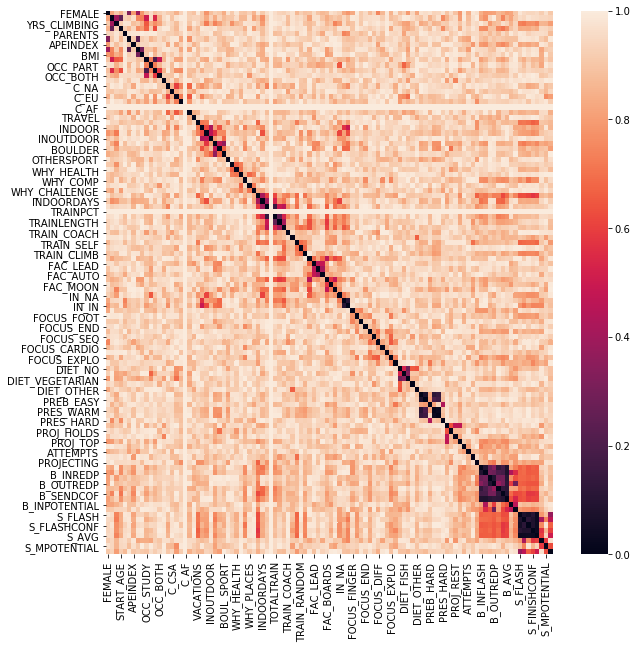

In [6]:
absCorr = corrDF.abs()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(ax=ax, data=(1-absCorr), vmin=0, vmax=1)

Ok, correlation is a measurement that tells us how related variables are. The higher the magnitude of the correlation, the more related the variables are. In the previous graph, since the plot is 1-corr instead of corr, the closer to 0 (black) the better. The reason why we can see a black diagonal is because every variable es completely correlated to itself.

However, just as in the previous notebook, it is hard to visualize anything if we show all the variables together, so lets try to focus again. This time, instead of manually selecting variables like in the previous notebook where we used different views, we can use the correlation itself and simply filter the best "n" variables out of those.

The correlation, specifically to "S_AVG" is the following.

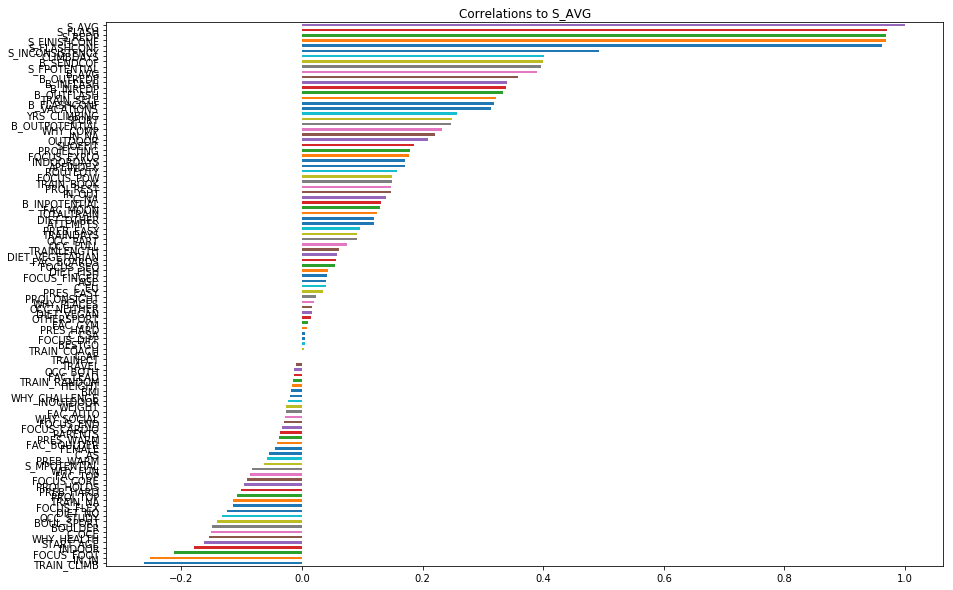

In [7]:
sortCorr = corrDF.sort_values(by="S_AVG",ascending=True).T.sort_values(by="S_AVG",ascending=True)
goal = sortCorr["S_AVG"]
goal.plot.barh(title="Correlations to S_AVG",figsize=(15, 10))

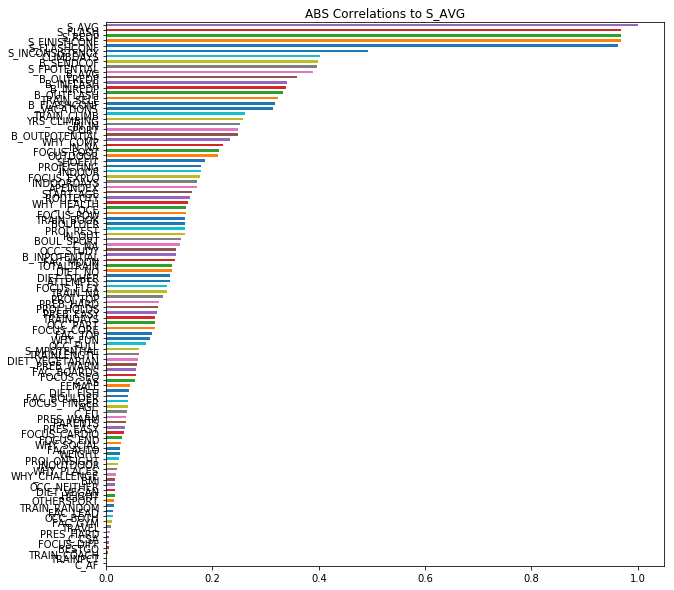

In [8]:
sortCorr2 = corrDF.abs().sort_values(by="S_AVG",ascending=True).T.sort_values(by="S_AVG",ascending=True)
goal2 = sortCorr2["S_AVG"]
goal2.plot.barh(title="ABS Correlations to S_AVG",figsize=(10, 10))

It is important to see them both as absolutes and as their signed value. The reason for this is because a variable with a correlation of -0.2 gives us more information than one with a correlation of 0.1, but we must be aware that the effect is the inverse. Negative correlation means, the higher the value of this variable, the lower the goal variable.

We can also manually filter other "goal" variables, since we would not be able to modify them in the first place so we do not care about them.

39


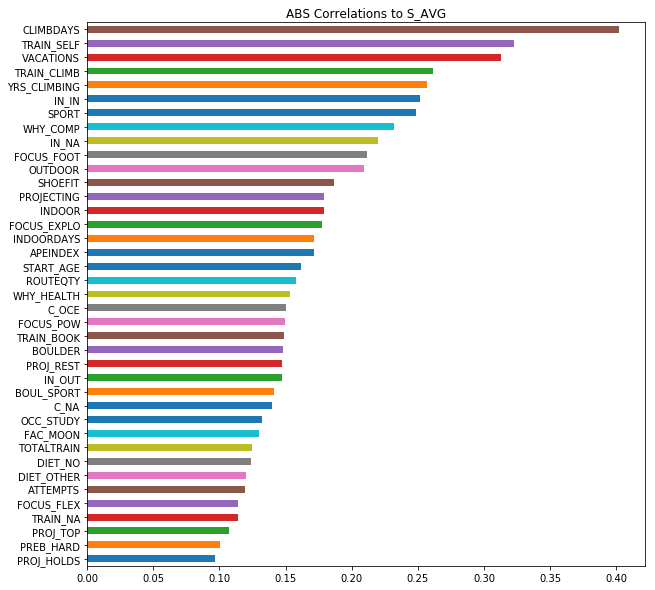

In [9]:
removeVars = ["B_INFLASH","B_INREDP","B_OUTFLASH","B_OUTREDP","B_FLASHCONF",
              "B_SENDCOF","B_AVG","B_INPOTENTIAL","B_OUTPOTENTIAL",
              "S_FLASH","S_REDP","S_FLASHCONF", "S_FINISHCONF",
              "S_FPOTENTIAL","S_MPOTENTIAL","S_INCONSISTENCY"]
goal2.drop(removeVars, inplace=True)
goal2 = goal2[-40:-1]
print(len(goal2))
goal2.plot.barh(title="ABS Correlations to S_AVG",figsize=(10, 10))

OK so how to interpret correlation? Easy, it basically means that knowing information about that variable lets you better predict the performance. In this case the things which one could modify and which have a higher impact in climbers' performance, in order, are:
-  +How many days a week they climb (including indoors)
-  +If they create their own training plan or something they read (-or if they just "train" by climbing more)
-  +If they take vacations specifically for climbing trips
-  +Focusing in either sportsclimbing (-or boulder)
-  +If they climb to compete (-or as a healthy hobby)
-  +If they focus in the outdoors
-  +If they train power endurance, explosive power (-or if they train footwork and flex)
-  +If they wear tighter shoes
-  +If they project
-  +If they give the routes several tries
-  +If they train on a moonboard
-  +If they climb more routes evey time they climb
-  +If they warmup (-or if they jump right into the hard stuff)

Others which have a high correlation but cannot be climbed are...
-  +How long how they have been climbing / how young they started climbing
-  +If they have a higher ape index

Interestingly height, weight and current age did not seem to be very correlated at all, which is a very nice thing. It shows that body type is usually not really a limiting factor for performance.

## Feature importance

We just analyzed correlation, which is good enough in many cases where relations are simply linear, but there are several other ways of finding feature importance where relations might be more complex. To do this, we will try a method called recursive feature elimination, where we start with all the features and remove the features that add noise instead of value (using different models to measure performance). 

For this experiment lets try linear regression, random forest regression, and gradient boosting regression. It is good to include the 3 to see which behaves better right now, and to combine their results, because models are very dependent on the data size. Right now we only have around 150 registries, but with more data the best predictor might change, and the feature importance would change as well, so it is good to have the models ready to keep it adaptable in case data scales.

We will test each model using 10-fold cross validation, which means training and testing with 10 different combinations of train/test divisions of the data, to ensure that the model is actually good and not that it simply got a very convenient split of the data.

In [10]:
X = data.copy().drop(removeVars,axis=1).drop("S_AVG",axis=1)
y = data.copy()["S_AVG"]

#no of features          
tests = [.2, .25, .3, .35]

high_score=0
score_list =[]
topTLR = 0
topFeatsLR = 0
topFeatsPosLR = 0
topFeatsRankLR = 0
featValsLR = 0
for t in tests: 
    print(t)
    #Variable to store the optimum features
    for n in range(1,len(X.columns)):
        X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = t, random_state = 0)
        model = LinearRegression()
        rfe = RFECV(model,n,cv=10)
        X_train_rfe = rfe.fit_transform(X_train,y_train)
        X_test_rfe = rfe.transform(X_test)
        model.fit(X_train_rfe,y_train)
        score = model.score(X_test_rfe,y_test)
        score_list.append(score)
        if(score>high_score and rfe.n_features_>9 and rfe.n_features_<40):
            topTLR = t
            high_score = score
            nof = rfe.n_features_
            topFeatsPosLR = rfe.support_
            topFeatsLR = X.columns[topFeatsPosLR]
            topFeatsRankLR = rfe.ranking_
            featValsLR = model.coef_
            print("Optimum number of features: %d" %nof)
            print("Score with %d features: %f" % (nof, high_score))
            print(topFeatsLR)
print(topFeatsRankLR)
print(featValsLR)
print(topFeatsLR)

0.2
Optimum number of features: 12
Score with 12 features: 0.132912
Index(['SPORT', 'BOULDER', 'BOUL_SPORT', 'TRAIN_BOOK', 'TRAIN_SELF', 'DIET_NO',
       'DIET_VEGETARIAN', 'DIET_VEGAN', 'DIET_OTHER', 'PREB_WARM', 'PREB_EASY',
       'PREB_HARD'],
      dtype='object')
0.25
Optimum number of features: 21
Score with 21 features: 0.173004
Index(['AGE', 'YRS_CLIMBING', 'START_AGE', 'HEIGHT', 'APEINDEX', 'WEIGHT',
       'BMI', 'BOUL_SPORT', 'CLIMBDAYS', 'TOTALTRAIN', 'TRAIN_BOOK',
       'TRAIN_CLIMB', 'FAC_TOP', 'FAC_AUTO', 'FAC_BOARDS', 'FAC_GYM',
       'FOCUS_DIFF', 'FOCUS_EXPLO', 'SHOEFIT', 'ROUTEQTY', 'BESTGO'],
      dtype='object')
Optimum number of features: 19
Score with 19 features: 0.201522
Index(['AGE', 'YRS_CLIMBING', 'START_AGE', 'HEIGHT', 'APEINDEX', 'WEIGHT',
       'BMI', 'CLIMBDAYS', 'TOTALTRAIN', 'TRAIN_NA', 'TRAIN_COACH',
       'TRAIN_BOOK', 'TRAIN_SELF', 'TRAIN_RANDOM', 'TRAIN_CLIMB', 'FAC_TOP',
       'FOCUS_DIFF', 'ROUTEQTY', 'BESTGO'],
      dtype='object')
Opti

In [11]:
X = data.copy().drop(removeVars,axis=1).drop("S_AVG",axis=1)
y = data.copy()["S_AVG"]

#no of features          
tests = [.2, .25, .3, .35]

high_score=0
score_list =[]
topTRF = 0
topFeatsRF = 0
topFeatsPosRF = 0
topFeatsRankRF = 0
featValsRF = 0
for t in tests: 
    print(t)
    #Variable to store the optimum features
    for n in range(1,len(X.columns)):
        X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = t, random_state = 0)
        model = RandomForestRegressor(n_estimators=100)
        rfe = RFECV(model,n,cv=10)
        X_train_rfe = rfe.fit_transform(X_train,y_train)
        X_test_rfe = rfe.transform(X_test)
        model.fit(X_train_rfe,y_train)
        score = model.score(X_test_rfe,y_test)
        score_list.append(score)
        if(score>high_score and rfe.n_features_>9 and rfe.n_features_<40):
            topTRF = t
            high_score = score
            nof = rfe.n_features_
            topFeatsPosRF = rfe.support_
            topFeatsRF = X.columns[topFeatsPosRF]
            topFeatsRankRF = rfe.ranking_
            featValsRF = model.feature_importances_
            print("Optimum number of features: %d" %nof)
            print("Score with %d features: %f" % (nof, high_score))
            print(topFeatsRF)
print(topFeatsRankRF)
print(featValsRF)
print(topFeatsRF)

0.2
Optimum number of features: 39
Score with 39 features: 0.317831
Index(['AGE', 'YRS_CLIMBING', 'START_AGE', 'HEIGHT', 'APEINDEX', 'WEIGHT',
       'BMI', 'OCC_STUDY', 'OCC_FULL', 'TRAVEL', 'VACATIONS', 'INDOOR',
       'SPORT', 'BOULDER', 'WHY_HEALTH', 'WHY_COMP', 'CLIMBDAYS', 'INDOORDAYS',
       'TRAINDAYS', 'TOTALTRAIN', 'TRAINLENGTH', 'TRAIN_SELF', 'TRAIN_RANDOM',
       'TRAIN_CLIMB', 'FAC_BOARDS', 'FAC_MOON', 'IN_IN', 'FOCUS_FOOT',
       'FOCUS_CORE', 'FOCUS_POW', 'FOCUS_DIFF', 'FOCUS_EXPLO', 'SHOEFIT',
       'DIET_NO', 'PREB_EASY', 'ROUTEQTY', 'ATTEMPTS', 'BESTGO', 'PROJECTING'],
      dtype='object')
Optimum number of features: 22
Score with 22 features: 0.350344
Index(['AGE', 'YRS_CLIMBING', 'START_AGE', 'HEIGHT', 'APEINDEX', 'WEIGHT',
       'BMI', 'TRAVEL', 'VACATIONS', 'SPORT', 'WHY_HEALTH', 'CLIMBDAYS',
       'TRAINDAYS', 'TOTALTRAIN', 'TRAIN_SELF', 'TRAIN_CLIMB', 'FOCUS_EXPLO',
       'SHOEFIT', 'PREB_EASY', 'ROUTEQTY', 'ATTEMPTS', 'BESTGO'],
      dtype='object')
O

In [12]:
X = data.copy().drop(removeVars,axis=1).drop("S_AVG",axis=1)
y = data.copy()["S_AVG"]

#no of features          
tests = [.2, .25, .3, .35]

high_score=0
score_list =[]
topTGB = 0
topFeatsGB = 0
topFeatsPosGB = 0
topFeatsRankGB = 0
featValsGB = 0
for t in tests: 
    print(t)
    #Variable to store the optimum features
    for n in range(1,len(X.columns)):
        X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = t, random_state = 0)
        model = GradientBoostingRegressor(n_estimators=100)
        rfe = RFECV(model,n,cv=10)
        X_train_rfe = rfe.fit_transform(X_train,y_train)
        X_test_rfe = rfe.transform(X_test)
        model.fit(X_train_rfe,y_train)
        score = model.score(X_test_rfe,y_test)
        score_list.append(score)
        if(score>high_score and rfe.n_features_>9 and rfe.n_features_<40):
            topTGB = t
            high_score = score
            nof = rfe.n_features_
            topFeatsPosGB = rfe.support_
            topFeatsGB = X.columns[topFeatsPosGB]
            topFeatsRankGB = rfe.ranking_
            featValsGB = model.feature_importances_
            print("Optimum number of features: %d" %nof)
            print("Score with %d features: %f" % (nof, high_score))
            print(topFeatsGB)
print(topFeatsRankGB)
print(featValsGB)
print(topFeatsGB)

0.2
Optimum number of features: 18
Score with 18 features: 0.311844
Index(['YRS_CLIMBING', 'START_AGE', 'APEINDEX', 'WEIGHT', 'BMI', 'VACATIONS',
       'SPORT', 'WHY_HEALTH', 'WHY_COMP', 'CLIMBDAYS', 'TRAINDAYS',
       'TOTALTRAIN', 'TRAIN_SELF', 'FAC_MOON', 'FOCUS_DIFF', 'SHOEFIT',
       'ROUTEQTY', 'BESTGO'],
      dtype='object')
Optimum number of features: 15
Score with 15 features: 0.325679
Index(['AGE', 'YRS_CLIMBING', 'START_AGE', 'APEINDEX', 'WEIGHT', 'BMI',
       'VACATIONS', 'SPORT', 'CLIMBDAYS', 'TRAINDAYS', 'TOTALTRAIN',
       'TRAIN_SELF', 'SHOEFIT', 'ROUTEQTY', 'BESTGO'],
      dtype='object')
Optimum number of features: 19
Score with 19 features: 0.335219
Index(['AGE', 'YRS_CLIMBING', 'START_AGE', 'HEIGHT', 'APEINDEX', 'WEIGHT',
       'BMI', 'VACATIONS', 'SPORT', 'WHY_HEALTH', 'WHY_COMP', 'CLIMBDAYS',
       'TRAINDAYS', 'TOTALTRAIN', 'TRAIN_SELF', 'FAC_MOON', 'SHOEFIT',
       'ROUTEQTY', 'BESTGO'],
      dtype='object')
0.25
Optimum number of features: 31
Score w

Ok now that we have 4 different sources of "feature importance":
-  Correlation Matrix
-  Recursive Feature Elimination
-  -  Linear Regression Feature Optimization
-  -  Random Forest Feature Optimization
-  -  Gradient Boosting Feature Optimization

We can merge them all into a single subset, to keep what we consider the most important variables for this particular problem.

In [13]:
topFeatsCorr = list(goal2.index)
topFeatsRFE = list(set(list(topFeatsLR)+list(topFeatsRF)+list(topFeatsGB)))
print(len(topFeatsLR))
print(len(topFeatsRF))
print(len(topFeatsGB))
print(len(topFeatsCorr))
print(len(topFeatsRFE))

17
38
31
39
45


So we have about 40 features resulting from the correlation approach, and about 40 features resulting from the RFE approach, we can use these 2 feature sets to create 2 levels of feature importance:
-  Important features: features that appear on either of the 2 feature sets
-  Best features: features that appear on both subsets

*I say about 40 features because this is a stochastic process, you could get different subsets ea

It can be useful to keep both because a smaller subset could be better at predicting the outcome, but worse at being understandable, interpretable or actionable by us humans, while a larger subset can allow humans to create strategies based on the variables available.

In [14]:
importantFeats = list(set(topFeatsRFE+topFeatsCorr))
print(len(importantFeats))

60


In [15]:
bestFeats = set(topFeatsRFE).intersection(topFeatsCorr)
print(len(bestFeats))

24


In [16]:
topFeatures = pd.DataFrame()
for c in importantFeats:
    topFeatures.loc[0,c]=c
    topFeatures.loc[1,c]=1
    topFeatures.loc[2,c]=0
    
for c in bestFeats:
    topFeatures.loc[2,c]=1
    
topFeatures = topFeatures.T
topFeatures.columns = ["FEATURE","IMPORTANT","BEST"]
topFeatures = topFeatures.reset_index(drop=True)
topFeatures

,FEATURE,IMPORTANT,BEST
0,FAC_MOON,1,1
1,C_NA,1,0
2,WHY_HEALTH,1,1
3,DIET_OTHER,1,0
4,TRAIN_BOOK,1,0
5,PROJECTING,1,1
6,IN_NA,1,0
7,WEIGHT,1,0
8,TRAVEL,1,0
9,OUTDOOR,1,0


In [17]:
topFeatures.to_csv("features.csv",index=False)

Now we have 2 lists with the variables that have the highest impact on sports climbing performance, these features can be used either by a data scientist to proceed with further data analysis, or by climbers or coaches to see what to focus on in order to improve.